Step 1: Dataset Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data=pd.read_csv("/content/covtype.csv")

In [3]:
data.shape

(581012, 55)

In [4]:
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [5]:
data.isnull().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


In [6]:
data['Cover_Type'].value_counts()

,count
Cover_Type,
2,283301
1,211840
3,35754
7,20510
6,17367
5,9493
4,2747


Step 2: Data Preprocessing

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
x=data.drop('Cover_Type',axis=1)
y=data['Cover_Type']

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((464809, 54), (116203, 54), (464809,), (116203,))

In [11]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

Step 3: Exploratory Data Analysis (EDA)

/tmp/ipython-input-392762611.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cover_Type", data=data, palette="viridis")


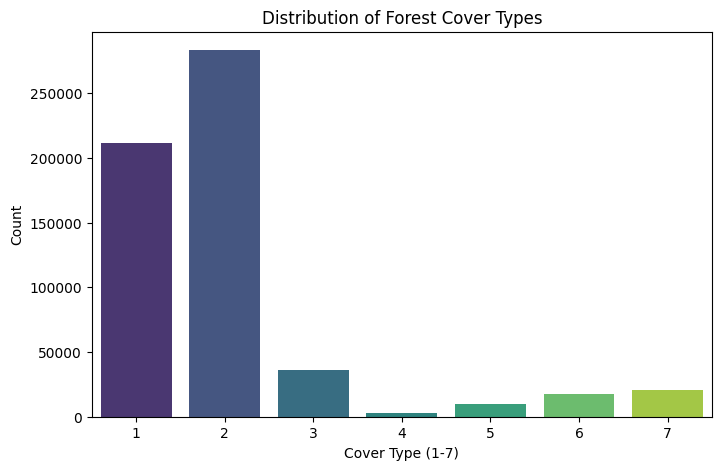

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x="Cover_Type", data=data, palette="viridis")
plt.title("Distribution of Forest Cover Types")
plt.xlabel("Cover Type (1-7)")
plt.ylabel("Count")
plt.show()


In [13]:
print("\nSummary Statistics:\n")
print(data.describe().T)


Summary Statistics:

                                       count         mean          std  \
Elevation                           581012.0  2959.365301   279.984734   
Aspect                              581012.0   155.656807   111.913721   
Slope                               581012.0    14.103704     7.488242   
Horizontal_Distance_To_Hydrology    581012.0   269.428217   212.549356   
Vertical_Distance_To_Hydrology      581012.0    46.418855    58.295232   
Horizontal_Distance_To_Roadways     581012.0  2350.146611  1559.254870   
Hillshade_9am                       581012.0   212.146049    26.769889   
Hillshade_Noon                      581012.0   223.318716    19.768697   
Hillshade_3pm                       581012.0   142.528263    38.274529   
Horizontal_Distance_To_Fire_Points  581012.0  1980.291226  1324.195210   
Wilderness_Area1                    581012.0     0.448865     0.497379   
Wilderness_Area2                    581012.0     0.051434     0.220882   
Wilderness_Area3

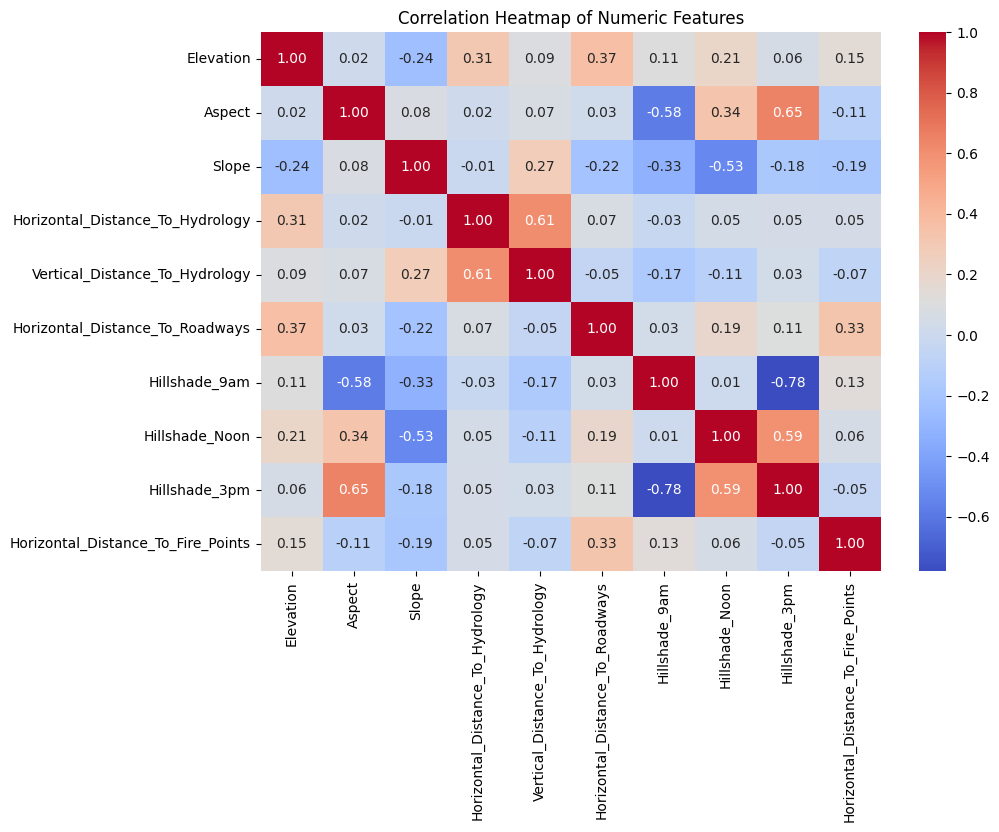

In [14]:
numeric_cols = ["Elevation", "Aspect", "Slope",
                "Horizontal_Distance_To_Hydrology",
                "Vertical_Distance_To_Hydrology",
                "Horizontal_Distance_To_Roadways",
                "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
                "Horizontal_Distance_To_Fire_Points"]

plt.figure(figsize=(10,7))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

Step 4: Baseline Models

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [16]:
model=LogisticRegression(max_iter=100, random_state=42)
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [17]:
y_pred=model.predict(x_test)

In [18]:
print("Logistic Regression Accuracy:",accuracy_score(y_test,y_pred) )
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred))


Logistic Regression Accuracy: 0.7238797621403923

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           1       0.71      0.70      0.71     42557
           2       0.75      0.80      0.77     56500
           3       0.67      0.81      0.73      7121
           4       0.53      0.35      0.42       526
           5       0.23      0.01      0.01      1995
           6       0.49      0.24      0.32      3489
           7       0.72      0.58      0.64      4015

    accuracy                           0.72    116203
   macro avg       0.59      0.50      0.52    116203
weighted avg       0.71      0.72      0.71    116203



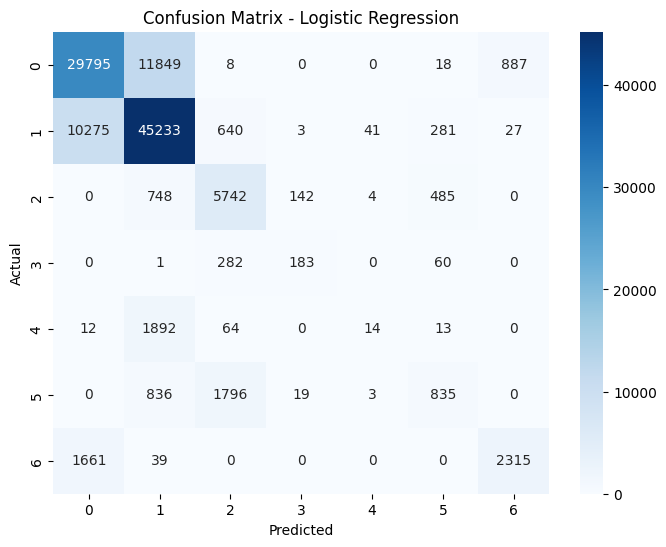

In [19]:
# Confusion Matrix - Logistic Regression
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [20]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
y_pred=model.predict(x_test)

In [22]:
print("\nDecision Tree Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred))


Decision Tree Accuracy: 0.9393475211483352

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           1       0.94      0.94      0.94     42557
           2       0.95      0.95      0.95     56500
           3       0.93      0.93      0.93      7121
           4       0.83      0.83      0.83       526
           5       0.84      0.82      0.83      1995
           6       0.88      0.89      0.89      3489
           7       0.94      0.95      0.95      4015

    accuracy                           0.94    116203
   macro avg       0.90      0.90      0.90    116203
weighted avg       0.94      0.94      0.94    116203



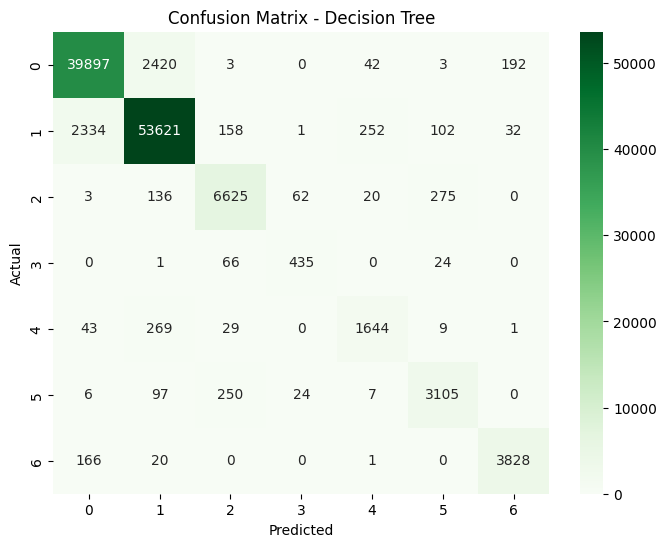

In [23]:
# Confusion Matrix - Decision Tree
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Step 5: Advanced Models for the Forest Cover Type Classification

In [24]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [25]:
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Resplit the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Scale the data after splitting
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [27]:
y_pred=model.predict(x_test)

In [28]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9551388518368716
              precision    recall  f1-score   support

           1       0.97      0.94      0.95     42557
           2       0.95      0.97      0.96     56500
           3       0.94      0.96      0.95      7121
           4       0.91      0.85      0.88       526
           5       0.94      0.77      0.85      1995
           6       0.94      0.90      0.92      3489
           7       0.97      0.96      0.96      4015

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.93    116203
weighted avg       0.96      0.96      0.95    116203



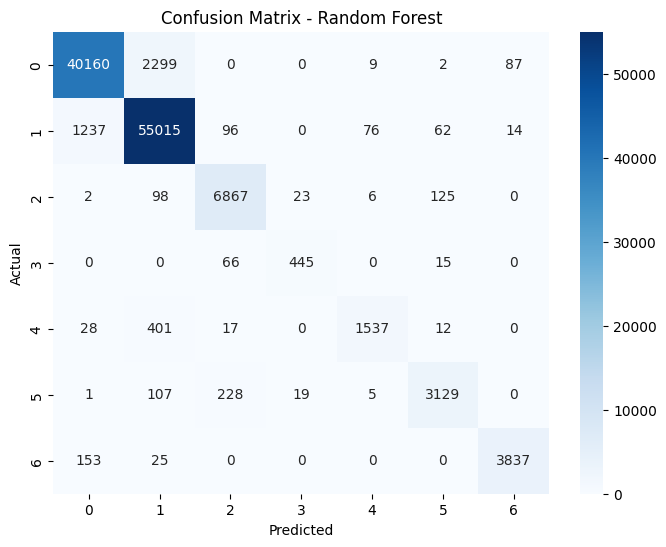

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True,fmt="d" ,cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


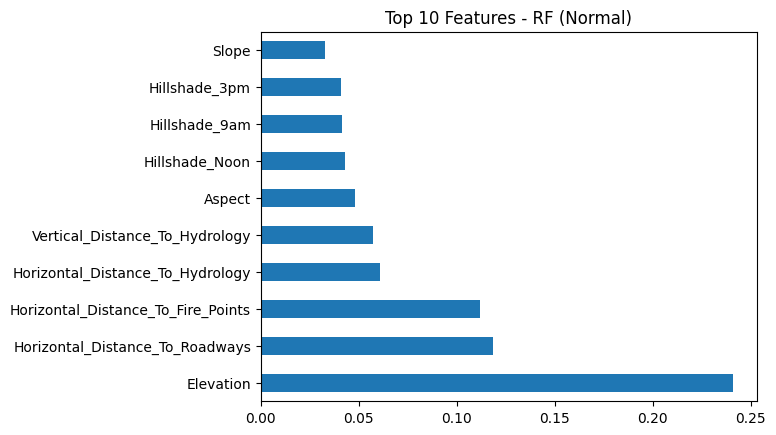

In [30]:
# Feature Importance
rf_importance = pd.Series(model.feature_importances_, index=x.columns)
rf_importance.nlargest(10).plot(kind="barh", title="Top 10 Features - RF (Normal)")
plt.show()


In [31]:
# Adjust labels to be zero-indexed for XGBoost
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

model =xgb.XGBClassifier(n_estimators = 100 , random_state = 42 , class_weight = 'balanced',max_depth=20)
model.fit(x_train , y_train_xgb)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:36:47] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "class_weight" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              class_weight='balanced', colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, ...)

In [32]:
# Adjust labels to be zero-indexed for prediction
y_pred = model.predict(x_test)
y_pred = y_pred + 1 # Convert back to original labels for evaluation

In [33]:
# Use the original y_test with labels 1-7 for evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9727459704138447
              precision    recall  f1-score   support

           1       0.98      0.97      0.97     42557
           2       0.97      0.98      0.98     56500
           3       0.97      0.97      0.97      7121
           4       0.94      0.88      0.91       526
           5       0.94      0.89      0.91      1995
           6       0.96      0.95      0.95      3489
           7       0.97      0.97      0.97      4015

    accuracy                           0.97    116203
   macro avg       0.96      0.94      0.95    116203
weighted avg       0.97      0.97      0.97    116203



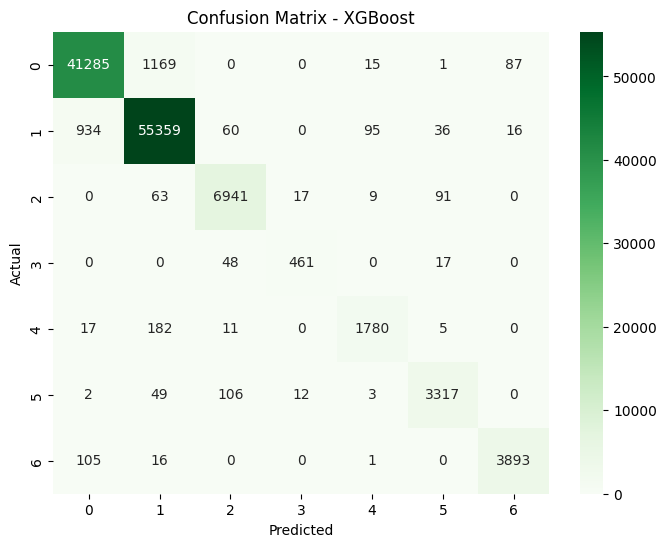

In [34]:
# Plot with class labels from 1–7 (not 0–6)
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


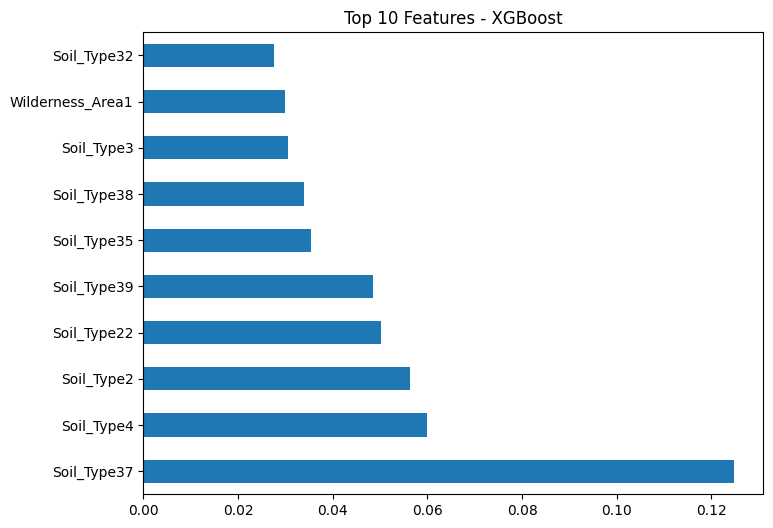

In [35]:
# Feature Importance
xgb_importance = pd.Series(model.feature_importances_, index=x.columns)
plt.figure(figsize=(8,6))
xgb_importance.nlargest(10).plot(kind="barh", title="Top 10 Features - XGBoost")
plt.show()

Step 6: Hyperparameter Tuning

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
# 1. Define base model
xgb_model = xgb.XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric="mlogloss"
)

# 2. Smaller parameter grid (reduced search space)
xgb_param_grid = {
    "n_estimators": [100],         # just 1 value instead of many
    "learning_rate": [0.1, 0.01],  # 2 options
    "max_depth": [6, 10]           # 2 options
}
# Total combinations = 1 × 2 × 2 = 4 (very fast 🚀)

In [38]:
# 3. Setup GridSearchCV
xgb_grid = GridSearchCV(
    estimator=xgb_model,
    param_grid=xgb_param_grid,
    cv=3,        # 3-fold cross-validation
    verbose=1,
    n_jobs=-1
)

In [39]:
# Adjust labels to be zero-indexed for XGBoost
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

In [40]:
# 4. Fit model on training data using zero-indexed labels
xgb_grid.fit(x_train, y_train_xgb)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:45:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01], 'max_depth': [6, 10],
                         'n_estimators': [100]},
             verbose=1)

In [41]:
# 5. Best results
print("Best Parameters:", xgb_grid.best_params_)
print("Best CV Accuracy:", xgb_grid.best_score_)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100}
Best CV Accuracy: 0.896811379093471


In [42]:
# 6. Evaluate on test set
y_pred = xgb_grid.best_estimator_.predict(x_test)
# Convert predictions back to original labels (1-7)
y_pred = y_pred + 1

print("Test Accuracy:", accuracy_score(y_test, y_pred))

Test Accuracy: 0.8997013846458353


In [43]:
# 1. Define base model
rf_model = RandomForestClassifier(random_state=42)

# 2. Define much smaller parameter grid (less computation)
rf_param_grid = {
    "n_estimators": [100],      # only 1 option
    "max_depth": [10, None],    # 2 options
}
# Total = 1 × 2 = 2 combinations ✅ (very light)

# 3. Setup GridSearchCV (reduced cv folds)
rf_grid = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    cv=2,              # only 2-fold cross validation
    verbose=1,
    n_jobs=-1
)

In [44]:
# 4. Fit model on training data
rf_grid.fit(x_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, None], 'n_estimators': [100]},
             verbose=1)

In [45]:
# 5. Print best parameters and CV accuracy
print("Best Parameters:", rf_grid.best_params_)
print("Best CV Accuracy:", rf_grid.best_score_)

# 6. Evaluate on test set
y_pred = rf_grid.best_estimator_.predict(x_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'max_depth': None, 'n_estimators': 100}
Best CV Accuracy: 0.9389125445612709
Test Accuracy: 0.9551388518368716
